## 다중회귀분석 구현하기(코스피와 시가총액 상위 20개 중 10개 기업 선정)

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# 한글포트 출력
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 삼성전자, KOSPI 데이터 불러오기
stock_price = yf.download({'005930.KS','000660.KS','373220.KS','207940.KS','005380.KS',
                           '068270.KS','000270.KS','105560.KS','035420.KS','005490.KS','^KS11'}, '2023-01-01', '2023-12-31')

# 수정종가 데이터 가져오기
df = stock_price['Adj Close']
# 수익률 데이터로 변경하기
df = stock_price["Adj Close"].pct_change()*100
df = df.dropna()
# 편의를 위한 컬럼명 변경
df.columns = ['기아',"SK하이닉스","현대차","POSCO 홀딩스","삼성전자", "NAVER", "셀트리온", "KB금융", "삼성 바이오로직스","LG에솔","코스피"]


[*********************100%%**********************]  11 of 11 completed


In [25]:
###### 삼성전자 005930
###### SK하이닉스 000660
###### LG에솔 373220
###### 삼성 바이오로직스 207940
###### 현대차 005380
###### 셀트리온 068270
###### 기아 000270
###### KB금융 105560
###### NAVER 035420
###### POSCO 홀딩스 005490

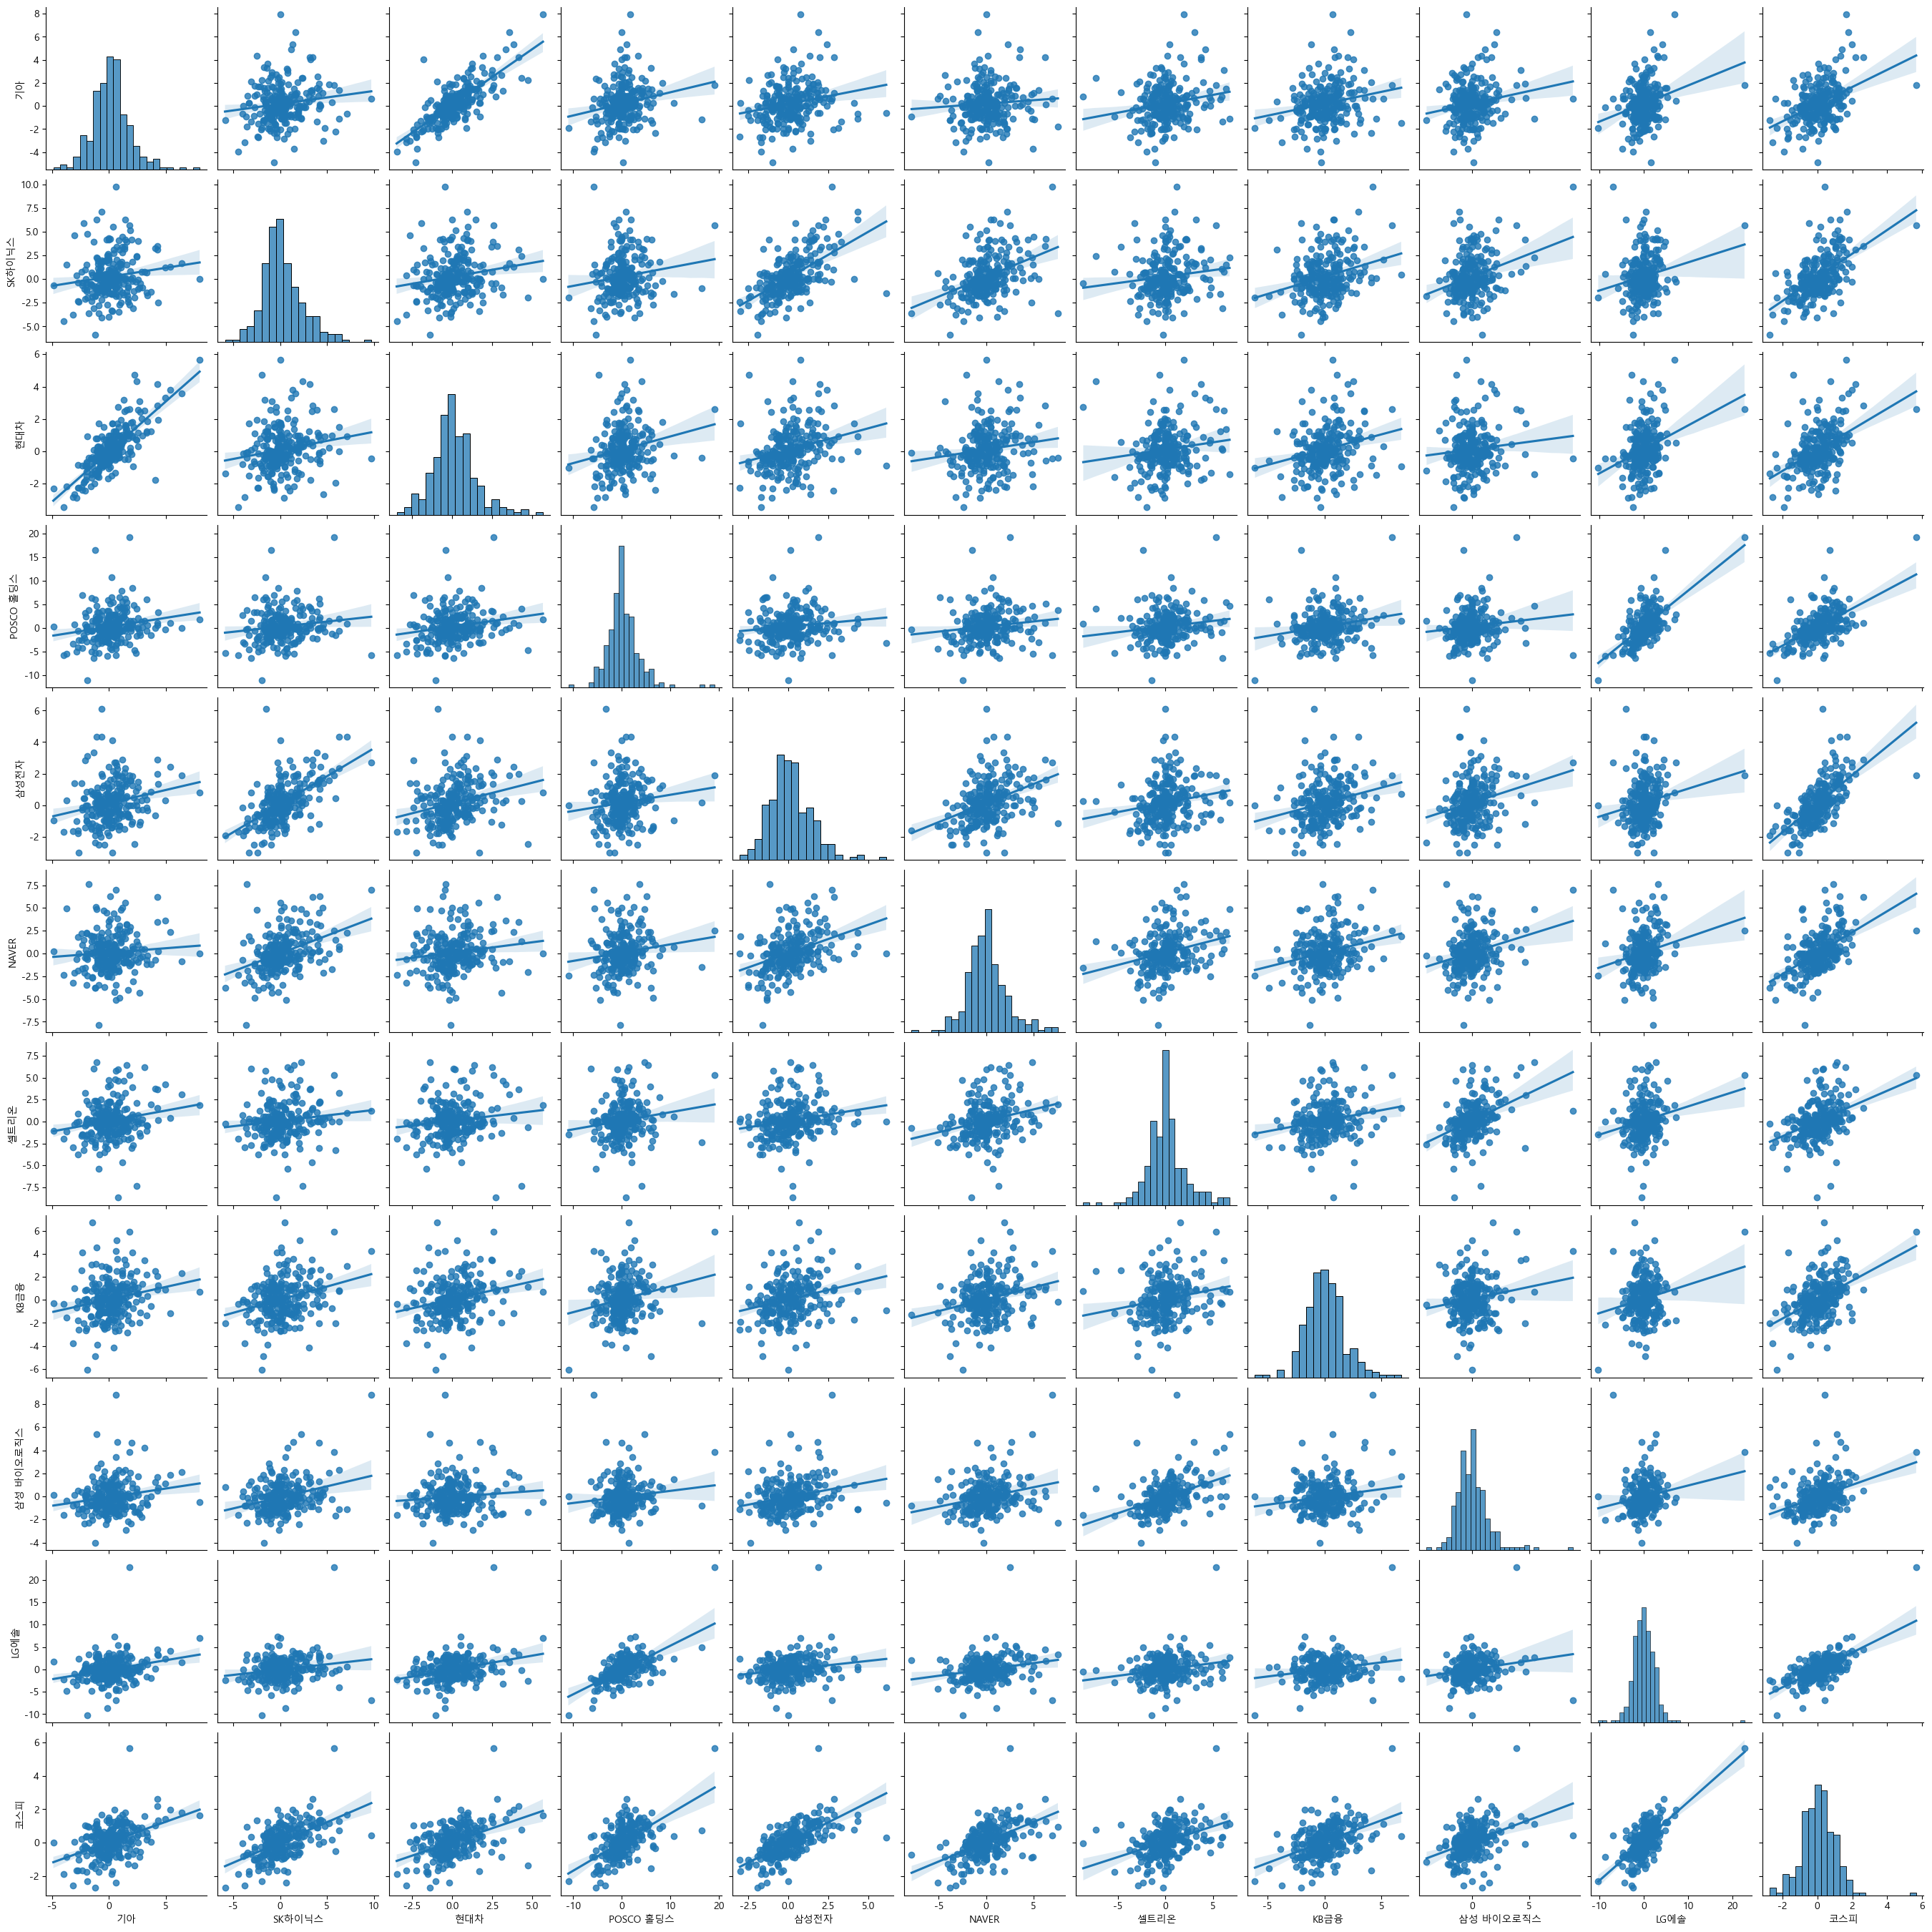

In [26]:
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(df, kind='reg')
plt.show()

In [27]:
df

,기아,SK하이닉스,현대차,POSCO 홀딩스,삼성전자,NAVER,셀트리온,KB금융,삼성 바이오로직스,LG에솔,코스피
Date,,,,,,,,,,,
2023-01-03,1.463415,-0.132114,1.273876,0.000000,-0.180184,-0.557101,-0.624995,3.046214,-2.902056,-1.233184,-0.314062
2023-01-04,-0.641026,7.142868,0.943390,0.919108,4.332144,2.240898,0.943399,2.956172,-1.120797,0.567537,1.681182
2023-01-05,-1.451613,0.493828,-0.934573,1.457182,0.692029,1.917811,1.557630,6.732668,1.763224,-2.144470,0.384308
2023-01-06,0.654664,2.088459,0.314463,2.693005,1.374573,-0.537641,0.306746,5.194805,0.000000,2.422145,1.118057
2023-01-09,4.227642,3.489771,2.821329,1.048956,2.881343,6.216223,1.529059,0.881837,0.495050,4.504505,2.629728
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,0.421053,0.000000,-0.200915,-1.915314,0.267364,-1.814055,0.751479,-0.187977,-0.973574,-2.196532,-0.546228
2023-12-22,0.209644,0.071189,0.150981,-1.233301,1.200004,-0.692840,-1.172090,-1.129941,1.123596,-0.827423,-0.019616
2023-12-26,0.732218,0.213358,-0.100491,-1.456821,0.922265,0.232553,1.778979,0.000000,0.277778,-0.953516,0.118487


In [28]:
import statsmodels.api as sm

# 회귀 분석을 위해 X에 상수항 추가
df_const = sm.add_constant(df.drop('코스피',axis=1))

# 회귀 모델 적합
model = sm.OLS(df['코스피'], df_const)
results = model.fit()

# 잔차 계산
residuals = results.resid

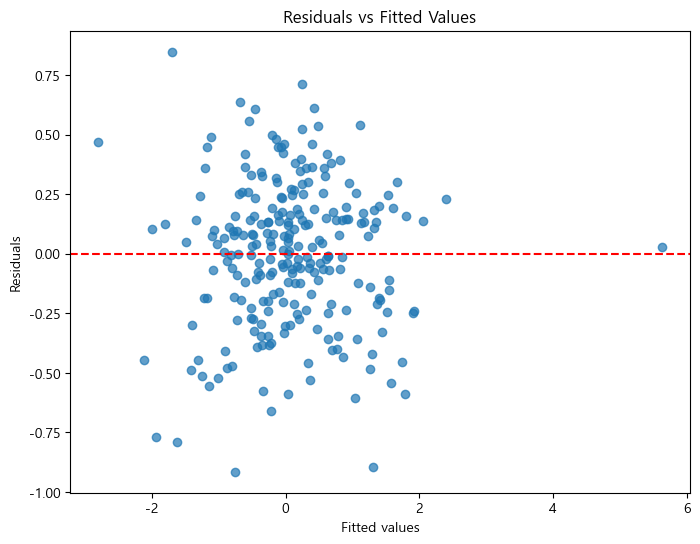

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(results.fittedvalues, residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

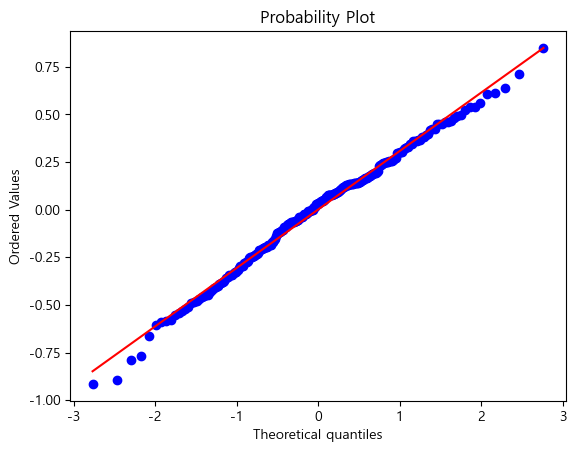

In [30]:
from scipy import stats

stats.probplot(residuals,dist=stats.norm,plot=plt)
plt.show()

In [31]:
from scipy.stats import shapiro

# Shapiro-Wilk test
shapiro_test = shapiro(residuals)
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')

Shapiro-Wilk test statistic: 0.9930933117866516, p-value: 0.317830353975296


In [32]:
# 독립성 검증 (Durbin-Watson 통계량)
dw_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.8855292068552663


In [33]:
import statsmodels.api as sm

feature_add = sm.add_constant(df.drop('코스피',axis=1), has_constant='add')

# sm OLS 적합
model = sm.OLS(df["코스피"] , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    코스피   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     211.9
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          5.95e-111
Time:                        20:05:14   Log-Likelihood:                -56.374
No. Observations:                 244   AIC:                             134.7
Df Residuals:                     233   BIC:                             173.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0358      0.020     -1.745      0.082      -0.076       0.005
기아             0.0607      0.019      3.153      0.002       0.023       0.099
SK하이닉스         0.0434      0.012      3.654      0.000       0.020       0.067
현대차            0.0370      0.024      1.520      0.130      -0.011       0.085
POSCO 홀딩스      0.0630      0.008      7.903      0.000       0.047       0.079
삼성전자           0.2619      0.019     13.502      0.000       0.224       0.300
NAVER          0.0715      0.011      6.571      0.000       0.050       0.093
셀트리온           0.0510      0.011      4.688      0.000       0.030       0.072
KB금융           0.0716      0.013      5.687      0.000       0.047       0.096
삼성 바이오로직스      0.0223      0.017      1.349      0.179      -0.010       0.055
LG에솔           0.1123      0.010     11.465      0.000       0.093       0.132
==============================================================================
Omnibus:                        3.076   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.871
Skew:                          -0.264   Prob(JB):                        0.238
Kurtosis:                       3.058   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
import statsmodels.api as sm

feature_add = sm.add_constant(df.drop(['코스피','삼성 바이오로직스','현대차'],axis=1), has_constant='add')

# sm OLS 적합
model = sm.OLS(df["코스피"] , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    코스피   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.40e-112
Time:                        20:05:14   Log-Likelihood:                -58.288
No. Observations:                 244   AIC:                             134.6
Df Residuals:                     235   BIC:                             166.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0386      0.020     -1.885      0.061      -0.079       0.002
기아             0.0837      0.013      6.563      0.000       0.059       0.109
SK하이닉스         0.0460      0.012      3.920      0.000       0.023       0.069
POSCO 홀딩스      0.0622      0.008      7.791      0.000       0.046       0.078
삼성전자           0.2652      0.019     13.693      0.000       0.227       0.303
NAVER          0.0735      0.011      6.754      0.000       0.052       0.095
셀트리온           0.0549      0.010      5.375      0.000       0.035       0.075
KB금융           0.0732      0.013      5.811      0.000       0.048       0.098
LG에솔           0.1151      0.010     11.859      0.000       0.096       0.134
==============================================================================
Omnibus:                        2.297   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                2.289
Skew:                          -0.234   Prob(JB):                        0.318
Kurtosis:                       2.918   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

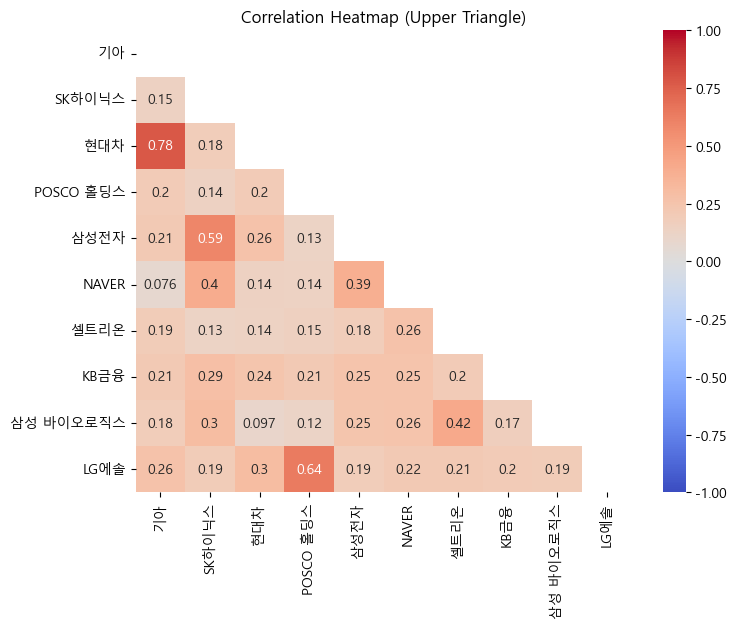

In [35]:
# 상관계수 계산
corr_matrix = df.drop('코스피', axis=1).corr()

# 상삼각행렬 마스크 생성
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Upper Triangle)')
plt.show()

In [41]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns 
                    
    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')
    
    return vif

vif(df.drop(["코스피","현대차"],axis=1))

,VIF Factor,features
0,1.801089,LG에솔
1,1.730342,SK하이닉스
2,1.712549,POSCO 홀딩스
3,1.667088,삼성전자
4,1.353709,NAVER
5,1.319416,삼성 바이오로직스
6,1.307297,셀트리온
7,1.194703,KB금융
8,1.159446,기아


In [36]:
import statsmodels.api as sm
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 변수 정의
feature = df.drop('코스피', axis=1)
variables = df.drop('코스피', axis=1).columns
y = df[["코스피"]]

# 선택된 변수들 list 생성
forward_valriables = []

# 전진선택시 P 값을 고려할 때, 선택과 제거 임계치 설정    
sl_enter = 0.05
sl_remove = 0.05

# 각 스텝별로 선택된 변수들
sv_per_step = [] 
# 각 스텝별 수정된 결정계수
adj_r_squared_list = []
# 스텝
steps = []
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(forward_valriables))
    pval = pd.Series(index=remainder)  # 변수의 p-value
    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합한다.
    for col in remainder: 
        X = feature[forward_valriables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit(disp=0)
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:  # 최소 p-value 값이 기준 값보다 작으면 포함
        forward_valriables.append(pval.idxmin())
        # 선택된 변수들에 대해서 어떤 변수를 제거할지 고른다.
        while len(forward_valriables) > 0:
            selected_X = feature[forward_valriables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit(disp=0).pvalues[1:]  # 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove:  # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                forward_valriables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(feature[forward_valriables])).fit(disp=0).rsquared_adj
        adj_r_squared_list.append(adj_r_squared)
        sv_per_step.append(forward_valriables.copy())

        # 추가된 코드: 각 단계별로 선택된 변수를 출력
        print(f"Step {step}: Selected Variables - {forward_valriables}, Adjusted R-squared: {adj_r_squared:.4f}")

    else:
        break

# 최종 선택된 변수 출력
print("Final selected variables:", forward_valriables)


Step 1: Selected Variables - ['LG에솔'], Adjusted R-squared: 0.4554
Step 2: Selected Variables - ['LG에솔', '삼성전자'], Adjusted R-squared: 0.7542
Step 3: Selected Variables - ['LG에솔', '삼성전자', 'KB금융'], Adjusted R-squared: 0.7999
Step 4: Selected Variables - ['LG에솔', '삼성전자', 'KB금융', 'NAVER'], Adjusted R-squared: 0.8282
Step 5: Selected Variables - ['LG에솔', '삼성전자', 'KB금융', 'NAVER', 'POSCO 홀딩스'], Adjusted R-squared: 0.8559
Step 6: Selected Variables - ['LG에솔', '삼성전자', 'KB금융', 'NAVER', 'POSCO 홀딩스', '기아'], Adjusted R-squared: 0.8783
Step 7: Selected Variables - ['LG에솔', '삼성전자', 'KB금융', 'NAVER', 'POSCO 홀딩스', '기아', '셀트리온'], Adjusted R-squared: 0.8896
Step 8: Selected Variables - ['LG에솔', '삼성전자', 'KB금융', 'NAVER', 'POSCO 홀딩스', '기아', '셀트리온', 'SK하이닉스'], Adjusted R-squared: 0.8959
Final selected variables: ['LG에솔', '삼성전자', 'KB금융', 'NAVER', 'POSCO 홀딩스', '기아', '셀트리온', 'SK하이닉스']


In [37]:
# 최종 모형 도출
X = sm.add_constant(df[forward_valriables])
model = sm.OLS(y, X).fit(disp=0)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    코스피   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     262.5
Date:                Wed, 11 Sep 2024   Prob (F-statistic):          1.40e-112
Time:                        20:05:15   Log-Likelihood:                -58.288
No. Observations:                 244   AIC:                             134.6
Df Residuals:                     235   BIC:                             166.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0386      0.020     -1.885      0.061      -0.079       0.002
LG에솔           0.1151      0.010     11.859      0.000       0.096       0.134
삼성전자           0.2652      0.019     13.693      0.000       0.227       0.303
KB금융           0.0732      0.013      5.811      0.000       0.048       0.098
NAVER          0.0735      0.011      6.754      0.000       0.052       0.095
POSCO 홀딩스      0.0622      0.008      7.791      0.000       0.046       0.078
기아             0.0837      0.013      6.563      0.000       0.059       0.109
셀트리온           0.0549      0.010      5.375      0.000       0.035       0.075
SK하이닉스         0.0460      0.012      3.920      0.000       0.023       0.069
==============================================================================
Omnibus:                        2.297   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.317   Jarque-Bera (JB):                2.289
Skew:                          -0.234   Prob(JB):                        0.318
Kurtosis:                       2.918   Cond. No.                         4.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

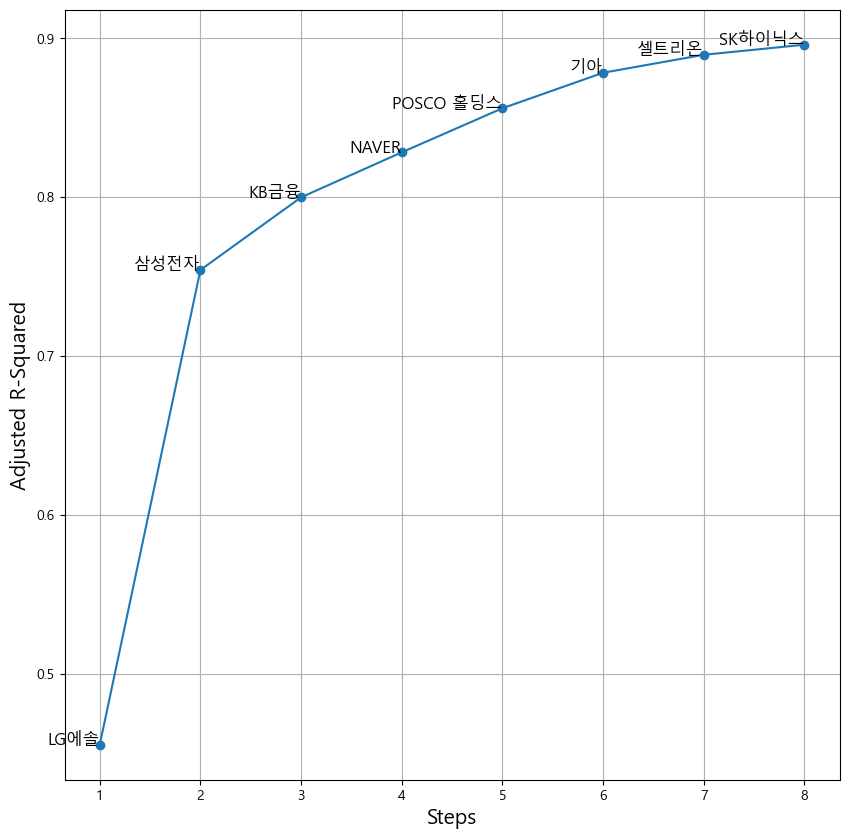

In [42]:
# 그래프 그리기
fig = plt.figure(figsize=(10, 10))
plt.plot(steps, adj_r_squared_list, marker='o')
plt.ylabel('Adjusted R-Squared', fontsize=15)
plt.xlabel('Steps', fontsize=15)
plt.grid(True)

# 선택된 변수 이름을 각 지점에 표시
for i, txt in enumerate(forward_valriables):
    plt.text(steps[i], adj_r_squared_list[i], txt, fontsize=12, ha='right')

plt.show()

Step 1: 제거된 변수: 삼성 바이오로직스
남은 변수: ['기아', 'SK하이닉스', '현대차', 'POSCO 홀딩스', '삼성전자', 'NAVER', '셀트리온', 'KB금융', 'LG에솔']

Step 2: 제거된 변수: 현대차
남은 변수: ['기아', 'SK하이닉스', 'POSCO 홀딩스', '삼성전자', 'NAVER', '셀트리온', 'KB금융', 'LG에솔']



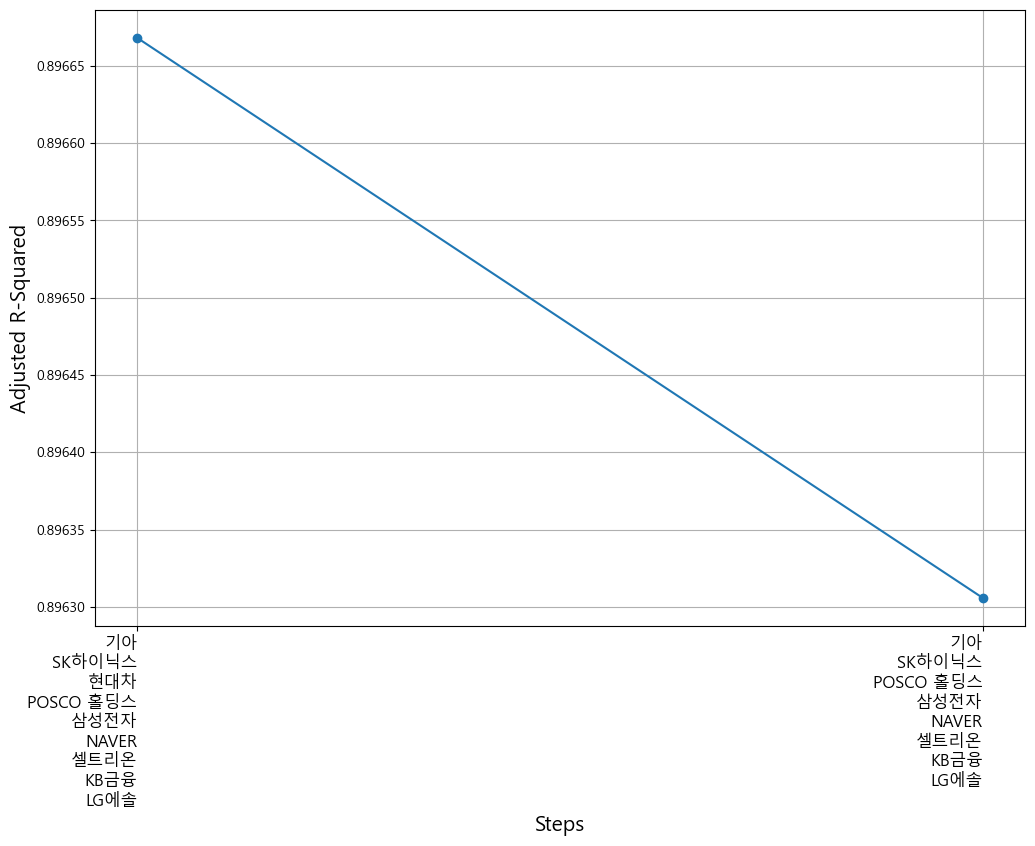

최종 선택된 변수들: ['기아', 'SK하이닉스', 'POSCO 홀딩스', '삼성전자', 'NAVER', '셀트리온', 'KB금융', 'LG에솔']


In [50]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

def backward_regression(feature, target, initial_list=[], threshold_out=0.05):
    # 선택된 변수, 단계별 수정된 결정계수, 단계 리스트 초기화
    included = feature.columns.tolist()
    sv_per_step = []  
    adj_r_squared_list = []  
    steps = []  
    
    def fit_model(X, y):
        """모델을 적합하고 p-values 및 수정된 결정계수를 반환하는 함수"""
        model = sm.OLS(y, sm.add_constant(X)).fit()
        return model.pvalues, model.rsquared_adj

    step = 0
    while True:
        pvalues, adj_r_squared = fit_model(feature[included], target)
        pvalues = pvalues.iloc[1:]  # 절편을 제외한 p-values
        
        # 가장 높은 p-value를 가진 변수 제거
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            step += 1
            steps.append(step)
            adj_r_squared_list.append(adj_r_squared)
            sv_per_step.append(included.copy())
            
            # 각 스텝마다 제거된 변수와 남은 변수를 출력
            print(f"Step {step}: 제거된 변수: {worst_feature}")
            print(f"남은 변수: {included}\n")
            
        else:
            break
        
    # 그래프 그리기
    plt.figure(figsize=(12, 8))
    plt.plot(steps, adj_r_squared_list, marker='o')
    plt.ylabel('Adjusted R-Squared', fontsize=15)
    plt.xlabel('Steps', fontsize=15)
    plt.grid(True)
    
    # x축 레이블을 단계별 선택된 변수들로 설정, 변수당 줄바꿈
    xtick_labels = ['\n'.join(sv) for sv in sv_per_step]
    plt.xticks(steps, xtick_labels, rotation=0, ha='right', fontsize=12)
    
    plt.show()
    
    print(f"최종 선택된 변수들: {included}")
    
    return included  # 최종 선택된 변수들을 반환

# 함수 호출
final_selected_features = backward_regression(feature, y)


In [48]:
# 최종 선택된 변수 출력
print("Final selected variables:", selected_variables)

NameError: name 'selected_variables' is not defined

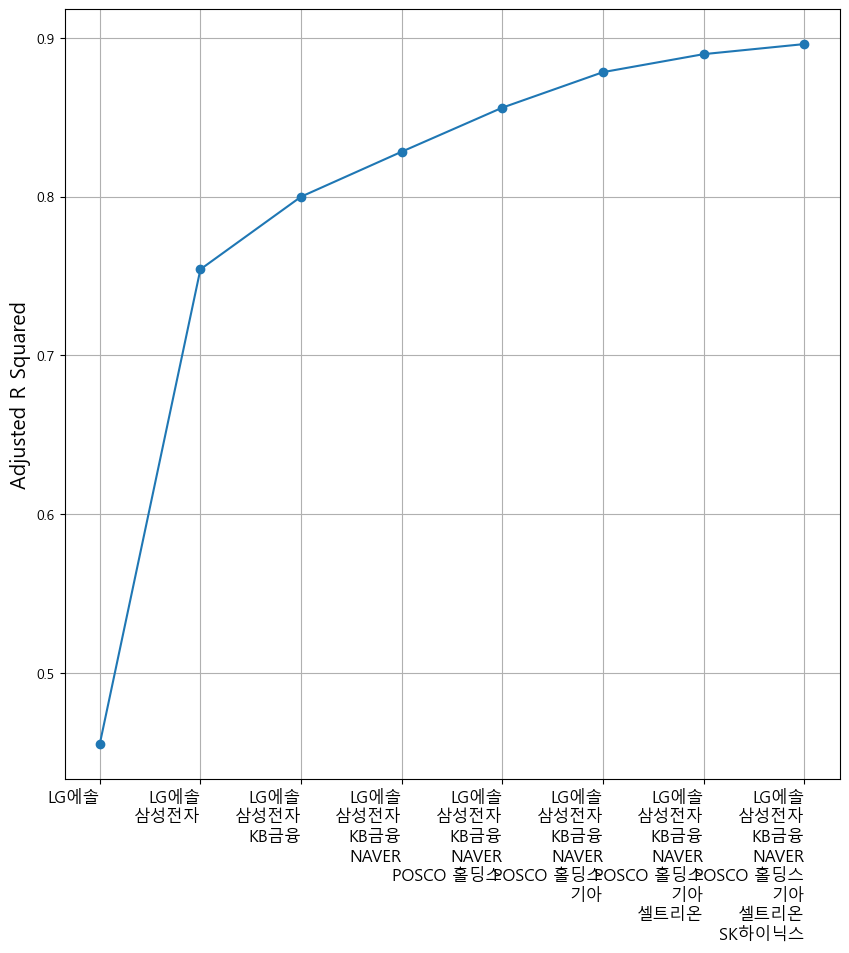

In [46]:
def stepwise_feature_selection(feature, target, variables=feature.columns.tolist()):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    import pandas as pd
    warnings.filterwarnings("ignore")
    
    y = target ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = feature[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = feature[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(feature[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
    
    # 시각화
    fig = plt.figure(figsize=(10,10))
    plt.plot(steps,adjusted_r_squared, marker='o')
    plt.ylabel('Adjusted R Squared',fontsize=15)
    plt.grid(True)


    
    # x축 레이블을 단계별 선택된 변수들로 설정, 변수당 줄바꿈
    xtick_labels = ['\n'.join(sv) for sv in sv_per_step]
    plt.xticks(steps, xtick_labels, rotation=0, ha='right', fontsize=12)
    
    plt.show()

    return model

stepwise_model = stepwise_feature_selection(feature, y)